In [9]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt
from astropy
%matplotlib inline

In [7]:
cat = Table.read("apogee_bulge.fits.gz", 1)

# Remove trailing spaces
for i in range(len(cat)):
    cat['FIELD'][i] = cat['FIELD'][i].strip()
uniqueFields = np.unique(cat["FIELD"])
#postive longitude is left side of buldge

#use help(INSERT COMMAND HERE) to get help on things

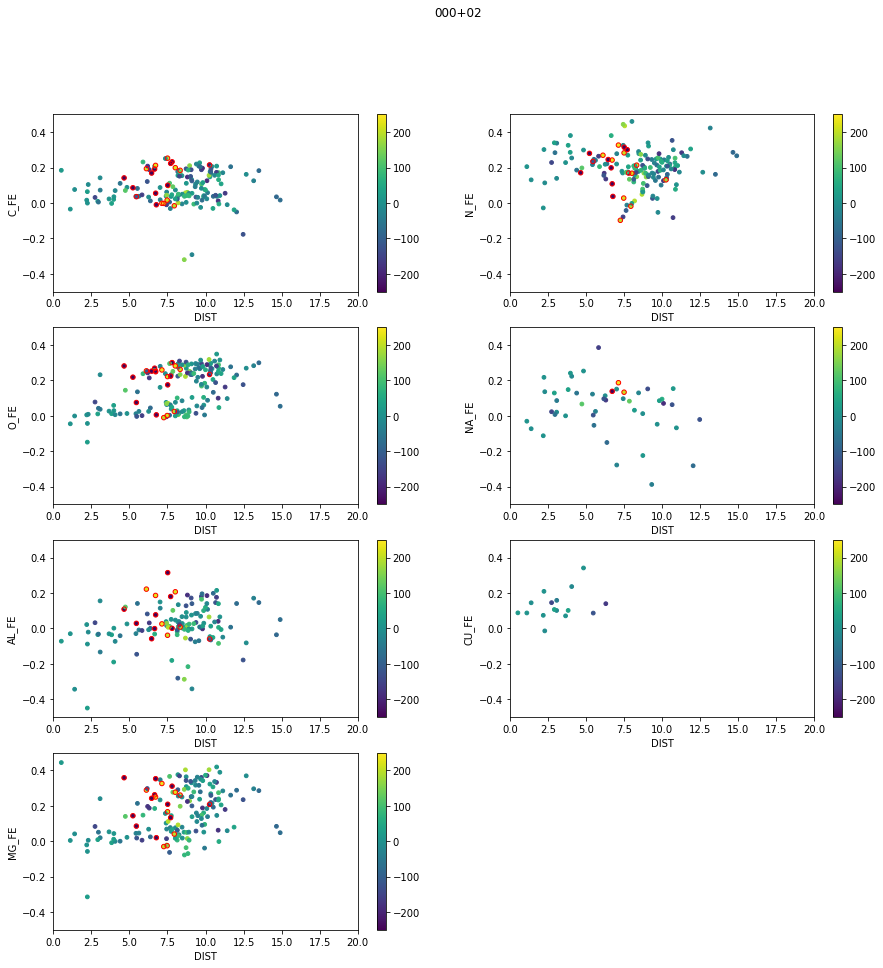

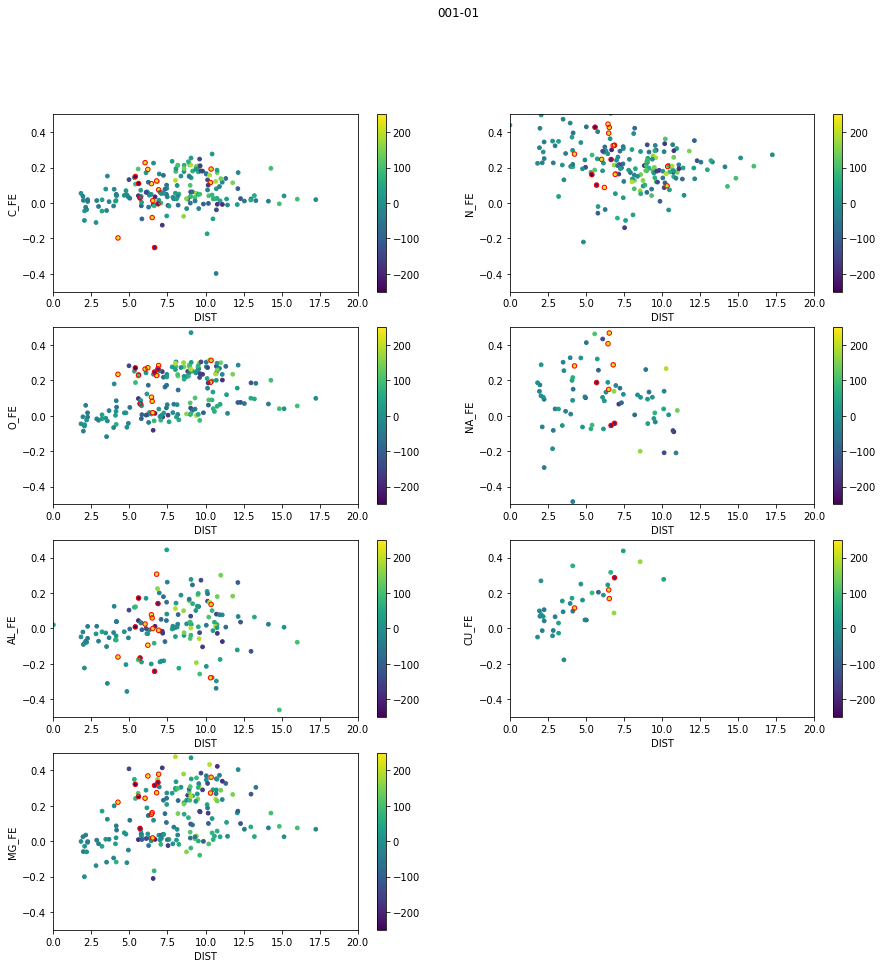

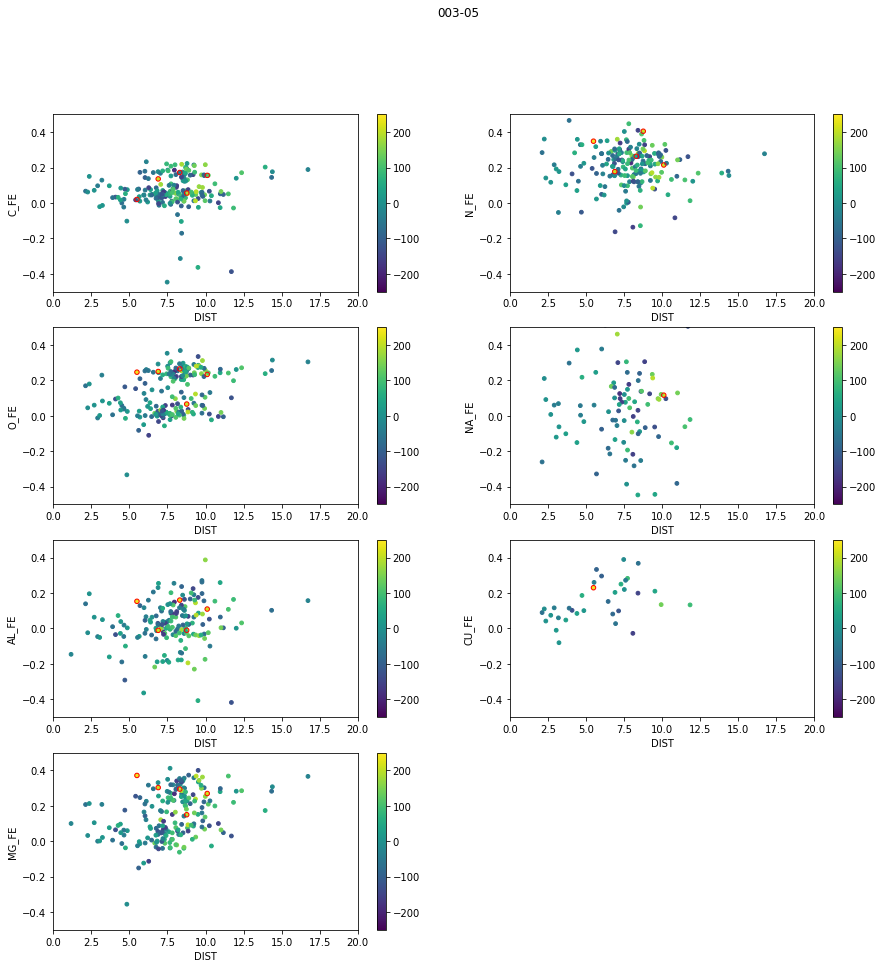

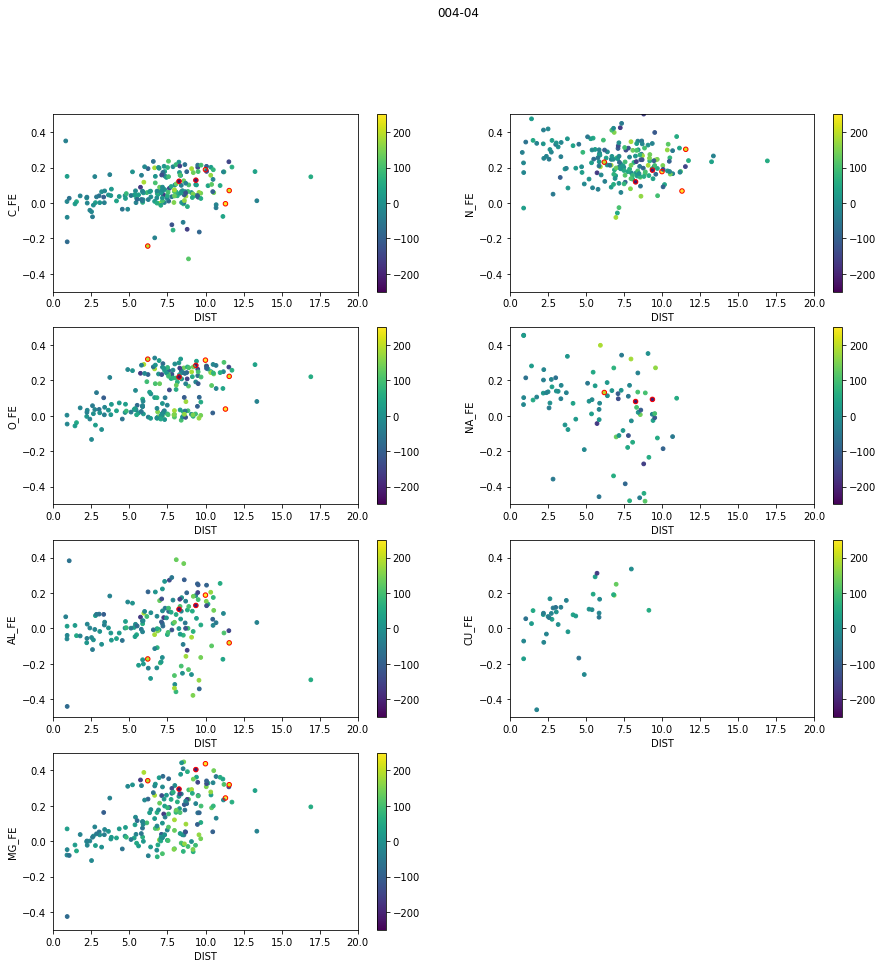

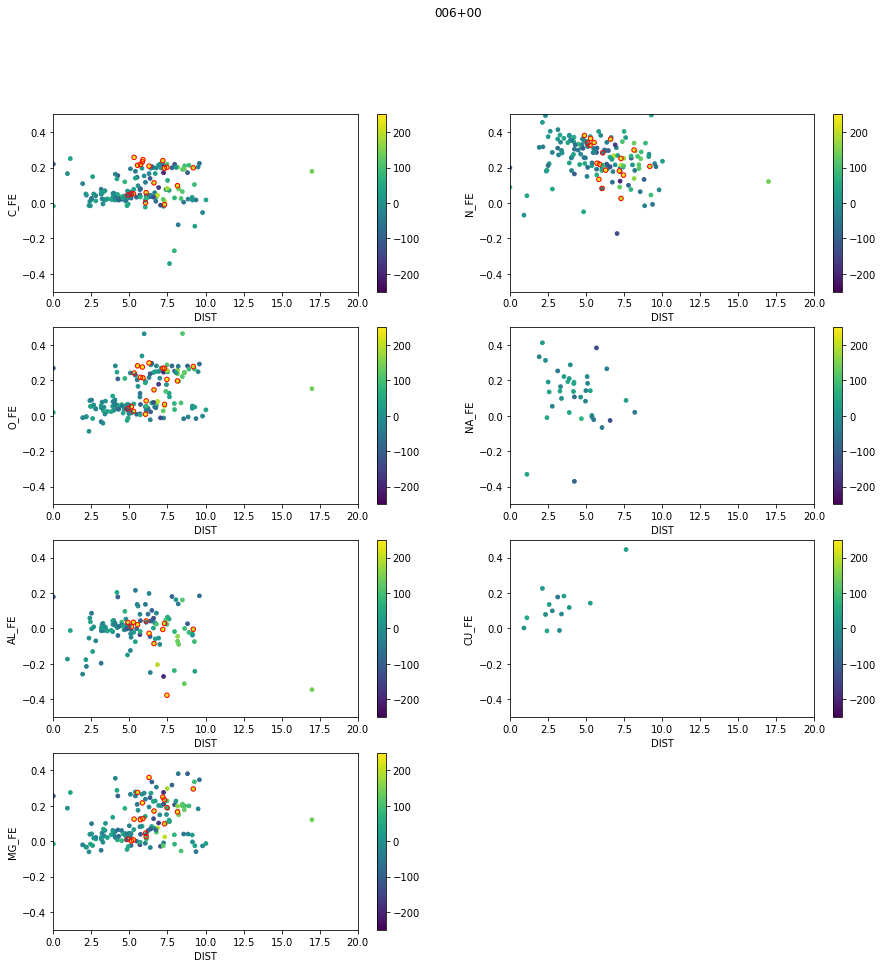

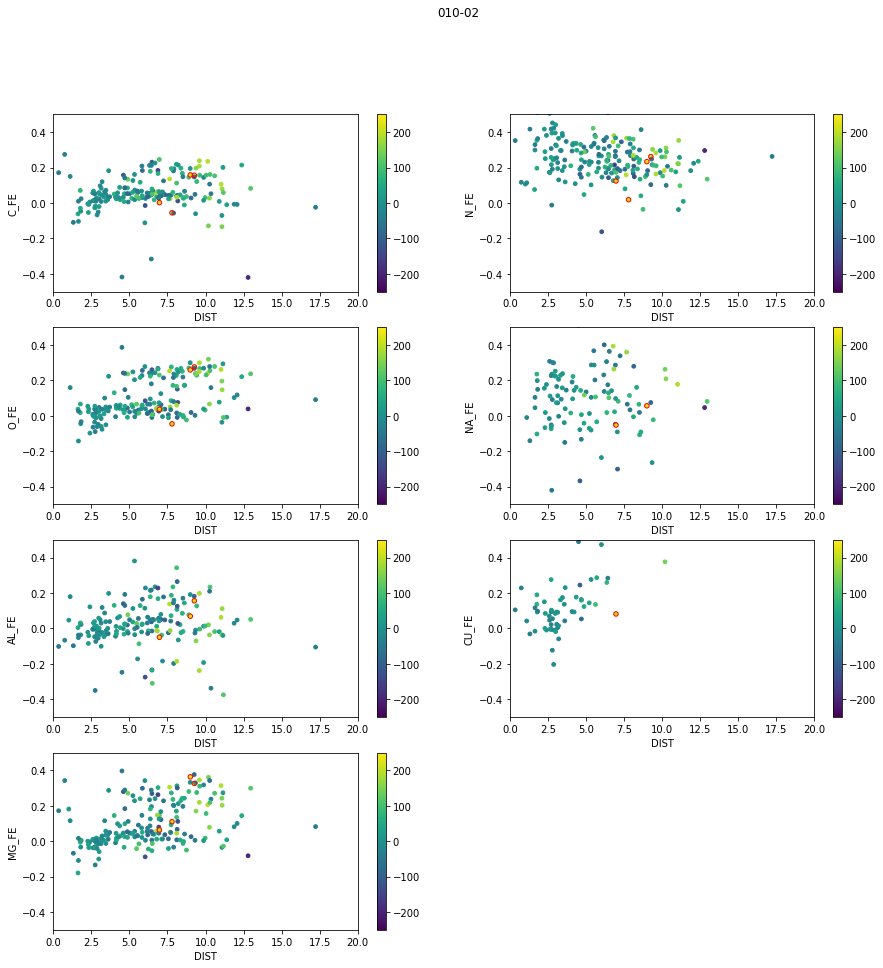

In [10]:
#looks at chemistry graphs
chemFields = ["000+02", "001-01", "003-05", "004-04", "006+00", "010-02"]
chemistry = ["C_FE", "N_FE", "O_FE", "NA_FE", "AL_FE", "CU_FE", "MG_FE"]

#write if statement for pos vs neg latitude

for i in chemFields:
    
    plt.figure(figsize = (15,15))
    for k,element in enumerate(chemistry, start=1):
        ind, = np.where((cat["FIELD"] == i) & (cat["SNR"]>20) & (cat["LOGG"]<3.8) & (abs(cat[element]<10)))
        field = cat[ind]
        dist = field["DIST"]
    
        indFast, = np.where((cat["FIELD"] == i) & (cat["SNR"]>20) & (cat["LOGG"]<3.8) & (abs(cat[element]<10)) & (200<abs(cat["VHELIO_AVG"])))
        fieldFast = cat[indFast]
        distFast = fieldFast["DIST"]
        
        nElement = field[element]
        nElementFast = fieldFast[element]
        
        plt.subplot(4, 2, k)
        plt.xlim(0,20)
        plt.ylim(-.5,.5)
        plt.xlabel("DIST")
        plt.ylabel(element)
        plt.suptitle(i)
        plt.scatter(dist, nElement, c = field["VHELIO_AVG"], vmin = -250, vmax = 250, s=14, marker = "o")
        plt.colorbar()
        plt.scatter(distFast, nElementFast, s = 20, edgecolors = "r", facecolors = "none", marker = "o")
        plt.show